In [299]:
import tensorflow as tf

Building a simple sequential model

In [301]:
#STEP 1 
#Import Sequential and neural network layers like this
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Softmax

In [302]:
#STEP 2
#Build the model and add layers
model = Sequential([
    Flatten(input_shape=(28,28), name="the start"),#To name add this Flatten layer basically takes a big vector and lobs it in 1 line so u can do shit
    Dense(16, activation ='relu'),#Dense layers are hidden layers which sifts through the data
    Dense(16, activation ='relu'),
    Dense(10, activation ='softmax')
])

C:\Users\44788\anaconda3\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [303]:
#Step 3
#Look at what you made
model.summary()

Model: "sequential_12"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ the start (Flatten)             │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_15 (Dense)                │ (None, 16)             │        12,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_16 (Dense)                │ (None, 16)             │           272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           170 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,002 (50.79 KB)

 Trainable params: 13,002 (50.79 KB)

 Non-trainable params: 0 (0.00 B)

Convolutional layer -
Same as linear sequential model buts groups together data into a 3x3 square or bigger
Intead of analysing cell by cell of an image it groups together peices and then analyses it thru dense layers

In [305]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D

In [306]:
model = Sequential([
    Conv2D(16, (3,3), activation='relu', input_shape=(28,28,1)),
    MaxPooling2D((3,3)),
    Flatten(),
    Dense(10, activation='softmax')
])

Conv2D(16, (3,3)
1. The 16 is the number of neurons same as dense
2. 3,3 is the size of the grouping
3. The 1 in input shape is number of channels so basically doubles the parameters
4. Padding is used to preserve output shape which get tricky with convolutional layers
5. Maxpooling puts it in the new shape and number of layers to put into dense layers

In [308]:
model.summary()

Model: "sequential_13"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_10 (Conv2D)              │ (None, 26, 26, 16)     │           160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_10 (MaxPooling2D) │ (None, 8, 8, 16)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_9 (Flatten)             │ (None, 1024)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │        10,250 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 10,410 (40.66 KB)

 Trainable params: 10,410 (40.66 KB)

 Non-trainable params: 0 (0.00 B)

_A compile function is used to configure a model for training_
1. The optimizer determines how the model is updated based on the loss function.2. The loss function measures how well the model performs on the training data 3. Metrics are used to evaluate the performance of the model during training

These can be configured further but longer codingg.

In [310]:
opt = tf.keras.optimizers.Adam(learning_rate=0.005)
acc = tf.keras.metrics.SparseCategoricalAccuracy()
mae = tf.keras.metrics.MeanAbsoluteError()
model.compile(optimizer=opt,
             loss='sparse_categorical_crossentropy',
             metrics=[acc])

Training A model





In [312]:
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [313]:
fashion_mnist_data = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist_data.load_data()

In [314]:
train_images.shape

(60000, 28, 28)

In [315]:
labels = [
    'T-shirt/top',
    'Trouser',
    'Pullover',
    'Dress',
    'Coat',
    'Sandal',
    'Shirt',
    'Sneaker',
    'Bag',
    'Ankle boot'
]

print(train_labels[5])

2


In [316]:
train_images = train_images / 255
test_images = test_images / 255

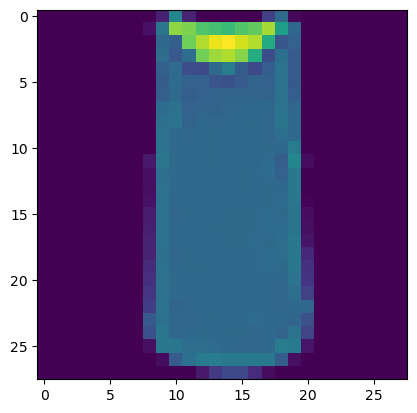

label: T-shirt/top


In [317]:
i=2
img = train_images[i,:,:]
plt.imshow(img)
plt.show()
print(f"label: {labels[train_labels[i]]}")

In [318]:
history = model.fit(train_images[...,np.newaxis], train_labels, epochs = 8, batch_size = 256, verbose=2)

Epoch 1/8
235/235 - 3s - 12ms/step - loss: 0.5687 - sparse_categorical_accuracy: 0.7991
Epoch 2/8
235/235 - 2s - 9ms/step - loss: 0.3723 - sparse_categorical_accuracy: 0.8691
Epoch 3/8
235/235 - 2s - 9ms/step - loss: 0.3418 - sparse_categorical_accuracy: 0.8781
Epoch 4/8
235/235 - 2s - 9ms/step - loss: 0.3242 - sparse_categorical_accuracy: 0.8835
Epoch 5/8
235/235 - 2s - 9ms/step - loss: 0.3087 - sparse_categorical_accuracy: 0.8893
Epoch 6/8
235/235 - 2s - 9ms/step - loss: 0.2987 - sparse_categorical_accuracy: 0.8939
Epoch 7/8
235/235 - 2s - 9ms/step - loss: 0.2904 - sparse_categorical_accuracy: 0.8960
Epoch 8/8
235/235 - 2s - 9ms/step - loss: 0.2819 - sparse_categorical_accuracy: 0.8981


In [319]:
test_loss, test_accuracy = model.evaluate(train_images[...,np.newaxis],train_labels, verbose=2)

1875/1875 - 2s - 1ms/step - loss: 0.2798 - sparse_categorical_accuracy: 0.8985


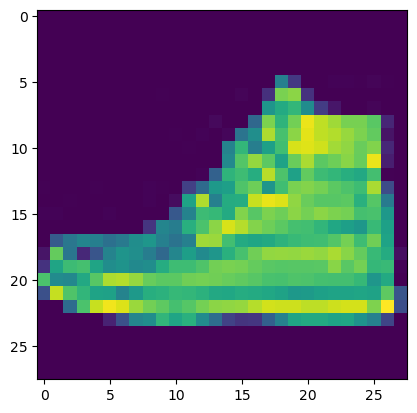

Label: Ankle boot


In [340]:
random_inx = np.random.choice(test_images.shape[0])

test_image = test_images[random_inx]
plt.imshow(test_image)
plt.show()
print(f"Label: {labels[test_labels[random_inx]]}")

In [342]:
predictions = model.predict(test_image[np.newaxis,...,np.newaxis])
print(f"model predicts: {labels[np.argmax(predictions)]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
model predicts: Ankle boot


In [392]:
import sklearn

In [394]:
from sklearn.datasets import load_diabetes

diabetes_dataset = load_diabetes()
print(diabetes_dataset["DESCR"])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [396]:
print(diabetes_dataset.keys())

dict_keys(['data', 'target', 'frame', 'DESCR', 'feature_names', 'data_filename', 'target_filename', 'data_module'])


In [398]:
data = diabetes_dataset["data"]
targets = diabetes_dataset["target"]

targets = (targets - targets.mean(axis=0)) / targets.std()
print(targets)

[-1.47194752e-02 -1.00165882e+00 -1.44579915e-01  6.99512942e-01
 -2.22496178e-01 -7.15965848e-01 -1.83538046e-01 -1.15749134e+00
 -5.47147277e-01  2.05006151e+00 -6.64021672e-01 -1.07957508e+00
  3.48889755e-01  4.26806019e-01 -4.43258925e-01  2.45001404e-01
  1.80071184e-01 -1.05621783e-01 -7.15965848e-01  2.06043272e-01
 -1.09256112e+00 -1.33929596e+00 -1.09256112e+00  1.20596866e+00
  4.13819975e-01  6.47568766e-01 -1.96524090e-01 -8.71798376e-01
 -2.74440354e-01  1.69943833e+00 -3.00412442e-01 -1.20943552e+00
  2.45262887e+00 -8.45826288e-01 -1.13151925e+00 -6.51035629e-01
  1.46568953e+00  1.60853602e+00  1.29687096e+00 -8.06868156e-01
 -6.77007716e-01 -1.26137969e+00 -1.18346343e+00 -7.80896068e-01
  1.38777327e+00 -1.28735178e+00  4.91736239e-01 -1.31593871e-01
 -1.00165882e+00 -1.31593871e-01  3.72247006e-02  9.46247777e-01
 -1.20943552e+00 -6.25063541e-01  3.87847887e-01 -3.13398486e-01
 -1.30033783e+00 -1.49512849e+00  2.32015360e-01  2.32015360e-01
 -1.18346343e+00 -1.05621

In [400]:
from sklearn.model_selection import train_test_split
train_data, test_data, train_targets, test_targets = train_test_split(data, targets, test_size=0.1)

print(train_data.shape)
print(test_data.shape)
print(train_targets.shape)
print(test_targets.shape)

(397, 10)
(45, 10)
(397,)
(45,)


In [494]:
from tensorflow.keras.layers import Dropout
from tensorflow.keras import regularizers

In [496]:
def get_regularised_model(wd, rate):
    model = Sequential([
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation ='relu', input_shape=(train_data.shape[1],)),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation ='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation ='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation ='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation ='relu'),
        Dropout(rate),
        Dense(128, kernel_regularizer=regularizers.l2(wd), activation ='relu'),
        Dropout(rate),
        Dense(1)
    ])
    return model


In [498]:
from tensorflow.keras.callbacks import Callback

class TrainingCallback(Callback):
    
    def on_train_begin(self, logs="None"):
        print("Training begins...")
    
    def on_epoch_begin(self, epoch, logs="None"):
        print(f"Starting epoch{epoch}")
        
    def on_train_batch_begin(self, batch, logs="None"):
        print(f"Starting batch{batch}")
        
    def on_train_batch_end(self, batch, logs="None"):
        print(f"Ending batch{batch}")
        
    def on_epoch_end(self, epoch, logs="None"):
        print(f"ending epoch{epoch}")

    def on_train_end(self, logs="None"):
        print("Training ending...")
    

In [500]:
model = get_regularised_model(1e-5, 0.3)

In [502]:
model.summary()

Model: "sequential_20"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_65 (Dense)                │ (None, 128)            │         1,408 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_18 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_66 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_19 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_67 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_20 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_68 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_21 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_69 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_22 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_70 (Dense)                │ (None, 128)            │        16,512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_23 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_71 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 84,097 (328.50 KB)

 Trainable params: 84,097 (328.50 KB)

 Non-trainable params: 0 (0.00 B)

In [504]:
model.compile(optimizer="adam", loss="mse", metrics=["mae"])

In [520]:
history = model.fit(train_data, train_targets, epochs = 50,validation_split=0.15, batch_size = 64, verbose=False, callbacks=[tf.keras.callbacks.EarlyStopping(patience=5)])

In [522]:
model.evaluate(test_data, test_targets, verbose=2)

2/2 - 0s - 20ms/step - loss: 0.4371 - mae: 0.5322


[0.4371400475502014, 0.532190203666687]

In [524]:
import matplotlib.pyplot as plt
%matplotlib inline

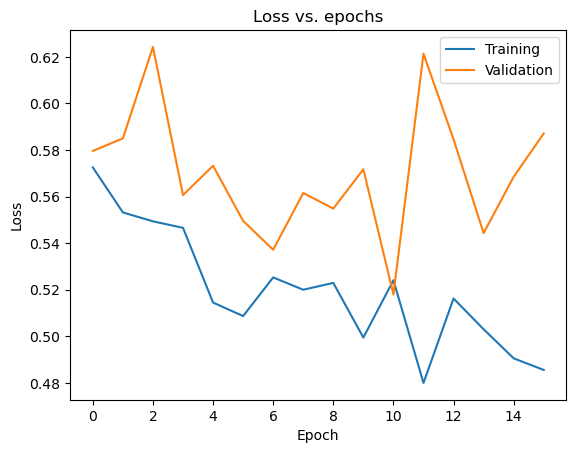

In [526]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show()